In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [254]:
dt = .01/2
N = 10000
I0 = .01/3


g = .6

def beta(i):   
    return  ((np.tanh(2*np.sin(3.14*(2.8*i+.8*N)/(N)))+1)*.5+.5)

In [255]:
S = np.zeros(N)           # percentage of pop susceptable
I = np.zeros(N)           # percentage of pop infected
R = np.zeros(N)           # percentage of pop removed
t = np.arange(N)*dt

# dS/dt = -b S I  
# dI/dt = b S I - g I  
# dR/dt = g I

S[0] = 1-I0
I[0] = I0
R[0] = 0

S[1] = - (beta(0)*S[0]*I[0])*dt+S[0]
I[1] = (beta(0)*S[0]*I[0]-g*I[0])*dt+I[0]
R[1] = g*I[0]*dt + R[0]

In [256]:
for i in np.arange(2,N):
    S[i] = - (beta(i-1)*S[i-1]*I[i-1])*dt*2+S[i-2]
    I[i] = (beta(i-1)*S[i-1]*I[i-1] - g*I[i-1])*dt*2+I[i-2]
    R[i] = (g*I[i-1])*dt*2+R[i-2]

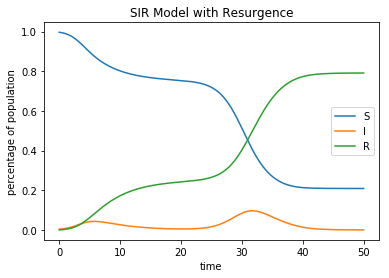

In [258]:
plt.plot(t,S,label = 'S')
plt.plot(t,I,label = 'I')
plt.plot(t,R,label = 'R')
plt.title('SIR Model with Resurgence')
plt.xlabel('time')
plt.ylabel('percentage of population')
plt.legend()